In [1]:
import sys
sys.path.append("../")
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from cellmating.mating import Mating
from cellmating.utils import file_traverse, dump_to_pkl
from cellmating.io import imread, imsave
from cellmating.mating import Mating
from script_wlli.for_check_result_utils import draw_subgraph

In [3]:
root = "/Volumes/T7/data/mating_all/20220903_YAV2104xYAV2105_003/"
file_list = file_traverse(root, file_regular=r".*/crop/.*.tif")
print("totle images: ", len(file_list))

totle images:  131


In [4]:
file_name = file_list[12]
image = imread(file_name)
file_name

'/Volumes/T7/data/mating_all/20220903_YAV2104xYAV2105_003/crop/YAV2104xYAV2105_005_04_rigid_003006.tif'

In [87]:
# from cellmating.tracking._ioutrack import Tracker
# from cellmating.tracking._iou_tracker import Tracker
from cellmating.tracking._hausdorf_tracker import Tracker
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
%%time
trace = Tracker(image[:, -2,], max_miss=20, min_hist=20)
_ = trace()
traced_image = trace.to_image()

frame= 1 [] [18]
fusion: [[0 1 1]
 [2 3 2]]
frame= 2 [17] [14]
frame= 3 [17] []
frame= 4 [17] [16]
frame= 5 [16, 17] []
frame= 6 [16, 17] []
frame= 7 [17] []
frame= 8 [16, 17] []
frame= 9 [16, 17] []
frame= 10 [16, 17] []
frame= 11 [16, 17] []
frame= 12 [16, 17] []
frame= 13 [16, 17] []
frame= 14 [16, 17] []
frame= 17 [17] [16]
frame= 18 [17] [16]
frame= 19 [17] []
divison: [[0 0 1]]
frame= 21 [17, 21, 22] [18]
frame= 22 [17, 21, 22] [15]
frame= 23 [16, 17, 20, 21] []
frame= 24 [16, 17, 20, 21] []
frame= 25 [16, 17, 20, 21] []
frame= 26 [17, 20, 21] []
divison: [[0 0 1]]
frame= 27 [16, 17, 20, 21] []
frame= 28 [16, 17, 20, 21] []
frame= 29 [16, 17, 18, 20, 21] []
frame= 30 [16, 17, 18, 20, 21] []
frame= 31 [16, 17, 18, 20, 21] []
frame= 32 [16, 17, 18, 20, 21] []
frame= 33 [16, 17, 18, 20, 21] []
frame= 34 [16] [16]
frame= 36 [6, 12, 20] [16, 17]
frame= 37 [16] [14]
frame= 38 [17, 20, 21] []
frame= 39 [16] []
frame= 40 [17, 20, 21] []
fusion: [[0 2 0]]
frame= 41 [17, 20, 21] []
frame= 

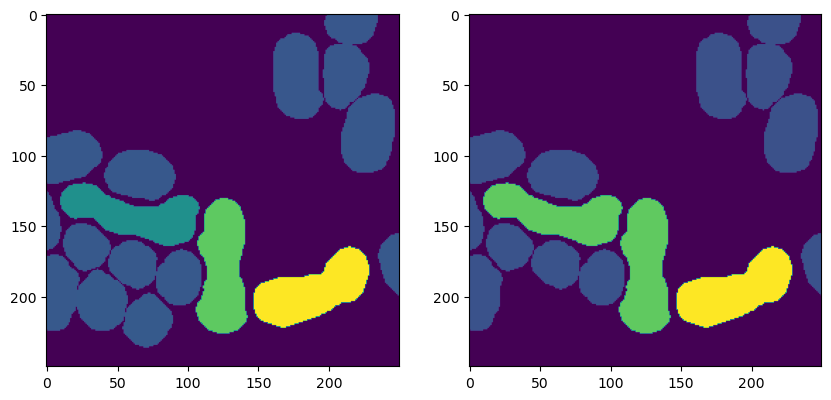

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
id = 200
axs[0].imshow(image[id,-2])
axs[1].imshow(traced_image[id])

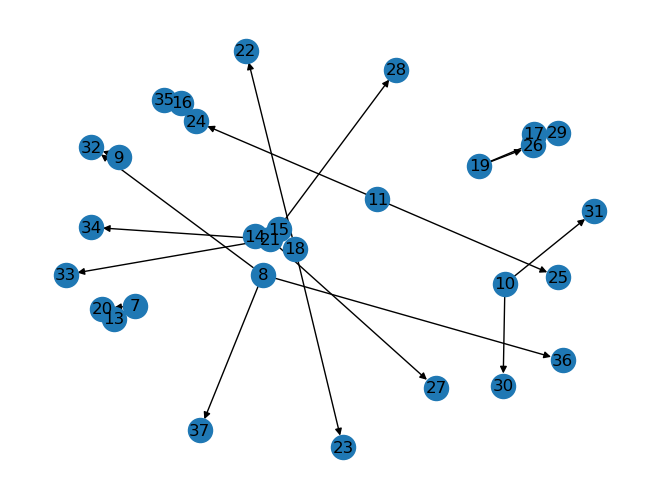

In [86]:
nx.draw(trace.network, with_labels=True)

In [44]:
a = [1,2,3,4,5,6,7]

In [45]:
for i in range(0, len(a)):
    if a[i] % 2 == 0:
        a.pop(i)

IndexError: list index out of range

In [21]:
tracked = np.zeros((image.shape[0], image.shape[1], image.shape[2], image.shape[3]), 
                   dtype=image.dtype)
tracked[:, 0:image.shape[1]-1] = image[:, 0:image.shape[1]-1]
tracked[:, image.shape[1]-1] = traced_image

In [22]:
key = int(file_name.split("_")[-1][:-4])
key = np.unique(tracked[-1,-1][tracked[-1,-2] == key])[0]%1000
c_mating = Mating(image=tracked, cells=trace.trackers, center=key, g=trace.network)

AttributeError: module 'networkx' has no attribute 'bfs_layout'

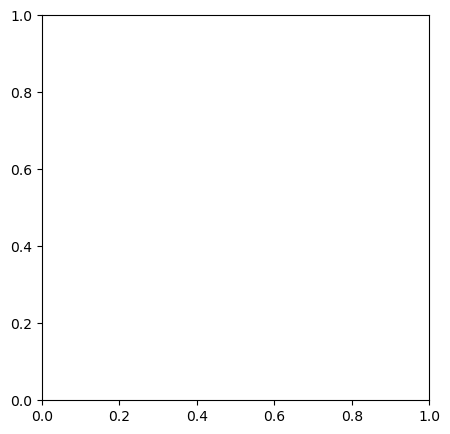

In [23]:
draw_subgraph(trace.network, key, c_mating.p, c_mating.m)
# plt.savefig("./figs_for_check_data/"+os.path.basename(file_name)[:-4]+"_net.png")

In [22]:
imsave("./test_trace_image.tif", traced_image, imagej=True)

In [9]:
imsave("./test_seg_image.tif", image[:, -2,], imagej=True)

In [68]:
tracked = np.zeros((image.shape[0], image.shape[1], image.shape[2], image.shape[3]), 
                   dtype=image.dtype)
tracked[:, 0:image.shape[1]-1] = image[:, 0:image.shape[1]-1]
tracked[:, image.shape[1]-1] = traced_image

In [47]:
save_name = file_name
imsave(save_name, tracked, imagej=True)
dump_to_pkl(trace.network, save_name[:-4]+".network")
dump_to_pkl(trace.trackers, save_name[:-4]+".tracker")

In [48]:
tracked.shape

(241, 5, 250, 250)

In [34]:
data = np.array([[0,1,2,],[3,4,5],[6,7,8]])

In [78]:
data

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [86]:
5 in data[:, 0:2]

False

In [80]:
data.sum(1)

array([ 3, 12, 21])

In [19]:
import statistics

In [36]:
statistics.mode([1,2,2,2,3,3,3,4,5,6])

2

In [31]:
from scipy import stats

In [34]:
stats.mode(np.array([1,2,2,2,3,3,3,4,5,6]) % 1000, keepdims=False)

ModeResult(mode=3, count=3)

In [35]:
stats.mode(np.array([1,2,3,3,3,4,5,6]) % 1000)

/tmp/ipykernel_297213/2505128182.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(np.array([1,2,3,3,3,4,5,6]) % 1000)


ModeResult(mode=array([3]), count=array([3]))